## Домашняя работа 3

❗Максимальный балл за домашнюю работу - 18, они переводятся в 10-ую шкалу.

✨Ребята, мы надеемся, что этот курс был полезен и с информативной точки зрения, и с точки зрения наполненности и интересности, но самое важное - это то, что останется с вами после ваших долгих часов практики и усердной работы, поэтому третья домашка направлена на закрепеление тех основ, которыми вы должны владеть обязательно, а главное понимать, зачем вы это делаете, и на сравнение "деревянных" моделей, поэтому большая часть домашки для вас должна быть уже знакома и понятна, приятна для выполнения, а часть связанная со сравнением будет красивым дополнением к отработке материала с занятия. Даже если не все из вас будут использовать все, что мы с вами прошли, то есть надежда на то, что курс помог вам расширить кругозор и дать больше понимания об интересных областях анализа данных, с которым вы непосредственно работаете или просто пересекаетесь по учебе✨

Удачи!

**Дедлайн:** до 09:00 (утра) 15.12.2025

**Формат сдачи:** файл ipynb, название файла должно быть в виде: Фамилия_БСЦ_Группа_HW3.ipynb. За неправильно названный файл полагается штраф. Сдача ДЗ ассистенту в личку Telegram: @snovasash 

В каждой части оцениваются как код, **так и ответы на вопросы.** Если вопрос задается конкретно, то предполагается, что вы дадите комментарии. Не забывайте комментировать код, чтобы было понятно, что вы делаете.

## Данные


В этой домашней работе мы будем обучать модели машинного обучения, ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week

Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

**Данные на гитхабе в папке data**

## Метрика качества

В задании мы будем оценивать качество моделей с помощью метрики AUC-ROC.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать:

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов:
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание

Давайте сначала загрузим все необходимые нам библиотеки

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
import time
import joblib

from tqdm import tqdm
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

Отключим предупреждения

In [5]:
warnings.filterwarnings("ignore")

Зафиксируем `seed` для воспроизводимости рандомных результатов.

In [6]:
random.seed(20251210)
np.random.seed(20251210)

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [7]:
df_dirty = pd.read_csv('../data/data.adult.csv')
df_dirty.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html).

В данном датасете пропущенные значения обозначены как "?".

**Задание 1 (1 балл)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [8]:
df_dirty.columns[(df_dirty == ('?')).any()]
df = df_dirty.replace('?', np.nan).dropna()

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем:

 - Выделите целевую переменную в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату (название целевой переменной >50K,<=50K)
 - Обратите внимание, что не все признаки являются вещественными. В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [9]:
y = (df['>50K,<=50K'] == '>50K').astype(int)
X = df.drop(columns=['>50K,<=50K'])
X_num = X.select_dtypes(include=['int', 'float'])

## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 3 алгоритма:
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [GradientBoosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

Для начала выберем один гиперпараметр, который будем оптимизировать:
 - (*max_depth*)

Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). ВНИМАНИЕ: во всех остальных заданиях используйте схему кросс-валидации, которую вы сделаете тут.

**Задание 2 (2 балла)** Для каждого из трех алгоритмов подберите оптимальные значения указанных гиперпараметров.

In [10]:
cv = KFold(n_splits=5)
param_grid = {'max_depth': np.arange(1, 30)}

### Дерево

In [11]:
tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(tree, param_grid, cv=cv, scoring='roc_auc')

grid_tree.fit(X_num, y)
best_tree = grid_tree.best_estimator_
best_tree_depth = grid_tree.best_params_['max_depth']
best_tree_auc = grid_tree.best_score_

Дерево. Лучший ROC-AUC на CV получается при max_depth = 7


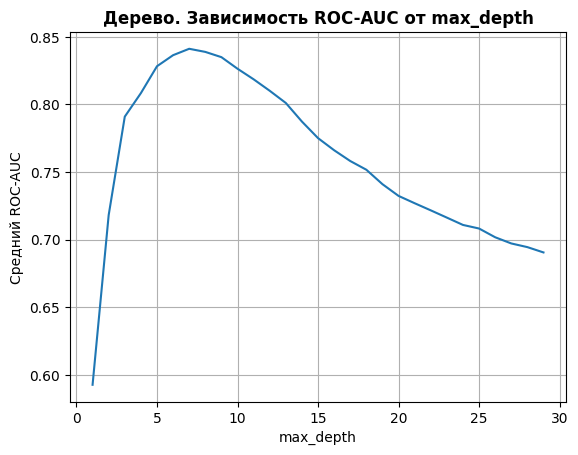

In [12]:
depths_tree = grid_tree.cv_results_['param_max_depth'].data.astype(int)
scores_tree = grid_tree.cv_results_['mean_test_score']

print('Дерево. Лучший ROC-AUC на CV получается при max_depth =', depths_tree[scores_tree.argmax()])

plt.plot(depths_tree, scores_tree)
plt.xlabel('max_depth')
plt.ylabel('Средний ROC-AUC')
plt.title('Дерево. Зависимость ROC-AUC от max_depth', fontweight='bold')
plt.grid(True)
plt.show()

### Случайный лес

In [13]:
random_forest = RandomForestClassifier()
grid_random_forest = GridSearchCV(random_forest, param_grid, cv=cv, scoring='roc_auc')

grid_random_forest.fit(X_num, y)
best_random_forest = grid_random_forest.best_estimator_
best_random_forest_depth = grid_random_forest.best_params_['max_depth']
best_random_forest_auc = grid_random_forest.best_score_

Случайный лес. Лучший ROC-AUC на CV получается при max_depth = 9


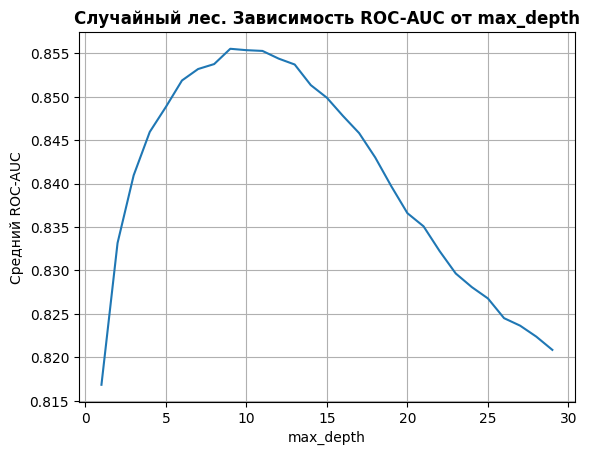

In [14]:
depths_random_forest = grid_random_forest.cv_results_['param_max_depth'].data.astype(int)
scores_random_forest = grid_random_forest.cv_results_['mean_test_score']

print('Случайный лес. Лучший ROC-AUC на CV получается при max_depth =', depths_random_forest[scores_random_forest.argmax()])

plt.plot(depths_random_forest, scores_random_forest)
plt.xlabel('max_depth')
plt.ylabel('Средний ROC-AUC')
plt.title('Случайный лес. Зависимость ROC-AUC от max_depth', fontweight='bold')
plt.grid(True)
plt.show()

### Бустинг

In [15]:
boosting = GradientBoostingClassifier()
grid_boosting = GridSearchCV(boosting, param_grid, cv=cv, scoring='roc_auc')

grid_boosting.fit(X_num, y)
best_boosting = grid_boosting.best_estimator_
best_boosting_depth = grid_boosting.best_params_['max_depth']
best_boosting_auc = grid_boosting.best_score_

Бустинг. Лучший ROC-AUC на CV получается при max_depth = 4


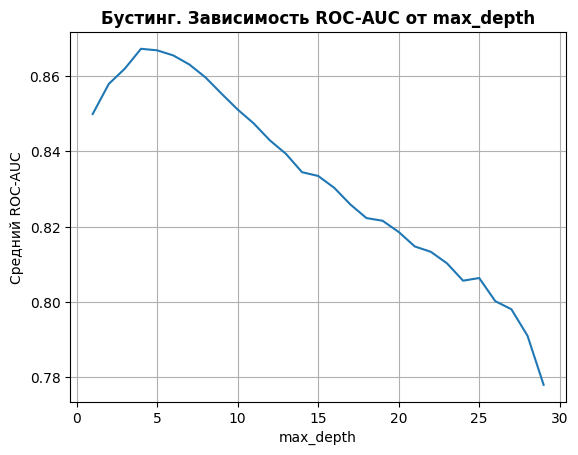

In [16]:
depths_boosting = grid_boosting.cv_results_['param_max_depth'].data.astype(int)
scores_boosting = grid_boosting.cv_results_['mean_test_score']

print('Бустинг. Лучший ROC-AUC на CV получается при max_depth =', depths_boosting[scores_boosting.argmax()])

plt.plot(depths_boosting, scores_boosting)
plt.xlabel('max_depth')
plt.ylabel('Средний ROC-AUC')
plt.title('Бустинг. Зависимость ROC-AUC от max_depth', fontweight='bold')
plt.grid(True)
plt.show()

In [17]:
print(f'Дерево: max_depth: {best_tree_depth}, ROC-AUC: {best_tree_auc:.2f}')
print(f'Лес: max_depth: {best_random_forest_depth}, ROC-AUC: {best_random_forest_auc:.2f}')
print(f'Бустинг: max_depth {best_boosting_depth}, ROC-AUC: {best_boosting_auc:.2f}')

Дерево: max_depth: 7, ROC-AUC: 0.84
Лес: max_depth: 9, ROC-AUC: 0.86
Бустинг: max_depth 4, ROC-AUC: 0.87


Что вы можете сказать?

**Мой комментарий:** лучшее качество показал Бустинг с параметром `max_depth` = 4

**Задание 3 (1 балл)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

**Что значит "качество стабилизируется"?**

Это означает, что при увеличении количества деревьев (n_estimators) метрика качества (например, точность или F1-score) перестает существенно расти. Например, если при n_estimators=100 точность составляет 0.90, а при n_estimators=200 — 0.91, а при n_estimators=500 — 0.911, то можно считать, что качество стабилизировалось при n_estimators=200.

*(Пример искусственный)*

In [18]:
random_forest_full = RandomForestClassifier(n_estimators=1000, max_depth=10)
random_forest_full.fit(X_num, y)

,n_estimators,1000
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
n_estimators_grid = np.arange(1, 1001, 10)
roc_auc_scores = []

for n in n_estimators_grid:
    n = random_forest_full.estimators_[:n]
    y_pred = np.mean([tree.predict_proba(X_num)[:, 1] for tree in n], axis=0)
    roc_auc_scores.append(roc_auc_score(y, y_pred))


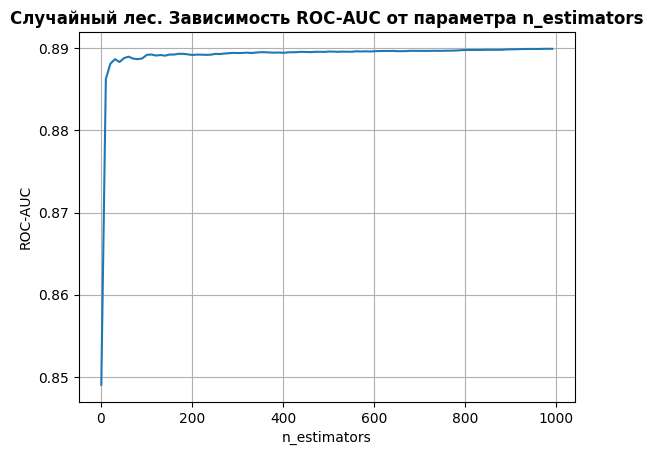

In [20]:
plt.plot(n_estimators_grid, roc_auc_scores)
plt.xlabel('n_estimators')
plt.ylabel('ROC-AUC')
plt.title('Случайный лес. Зависимость ROC-AUC от параметра n_estimators', fontweight='bold')
plt.grid(True)
plt.show()

**Мой ответ:** стабилизация качества означает то, что наша метрика качества выходит на флэт с определенного значения гиперпараметра (`n_estimators` = 300) и дальнейшее увеличение не даёт прироста в метрике с точки зрения практической значимости

В дальнейшем будем использовать значение гиперпараметра `n_estimators` = 300

**Задание 4 (1 балл)** Подберём число деревьев (*n_estimators*) в алгоритме GradientBoosting. Мы знаем, что ошибка бустинга на тестовых данных, как правило, имеет U-образную форму, то есть сначала уменьшается, а при достижении некоторого числа деревьев начинает расти. Нарисуйте график ошибки в зависимости от числа деревьев. Подберите n_estimators, соответствующий минимуму ошибки.

In [21]:
param_grid = {'n_estimators': np.arange(1, 1000, 50)}

boosting = GradientBoostingClassifier()
grid_boosting = GridSearchCV(boosting, param_grid, cv=cv, scoring='roc_auc')

grid_boosting.fit(X_num, y)
best_boosting = grid_boosting.best_estimator_
best_boosting_depth = grid_boosting.best_params_['n_estimators']
best_boosting_auc = grid_boosting.best_score_

Бустинг. Лучший ROC-AUC на CV получается при n_estimators = 301


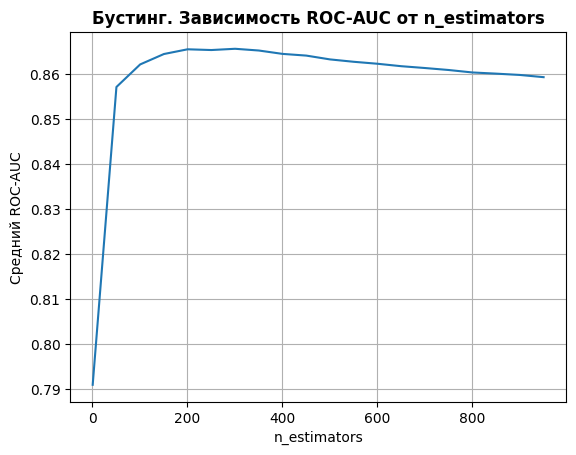

In [22]:
depths_boosting = grid_boosting.cv_results_['param_n_estimators'].data.astype(int)
scores_boosting = grid_boosting.cv_results_['mean_test_score']

print('Бустинг. Лучший ROC-AUC на CV получается при n_estimators =', depths_boosting[scores_boosting.argmax()])

plt.plot(depths_boosting, scores_boosting)
plt.xlabel('n_estimators')
plt.ylabel('Средний ROC-AUC')
plt.title('Бустинг. Зависимость ROC-AUC от n_estimators', fontweight='bold')
plt.grid(True)
plt.show()

**Мой комментарий:** лучшее качество бустинг показывает при значении параметра `n_estimators` = 300.

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**Задание 5 (1 балл)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*. Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

In [23]:
def my_histplot(df, col, bins=30):
    sns.histplot(df[col], bins=bins)
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.title(f'Распределение для переменной {col}', fontweight='bold')
    plt.grid(True)
    plt.show()

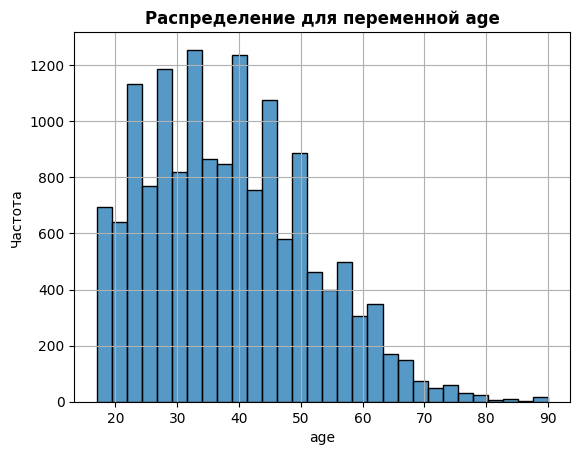

In [24]:
my_histplot(X_num, 'age')

**Мой комментарий:** в целом, выбросов нет

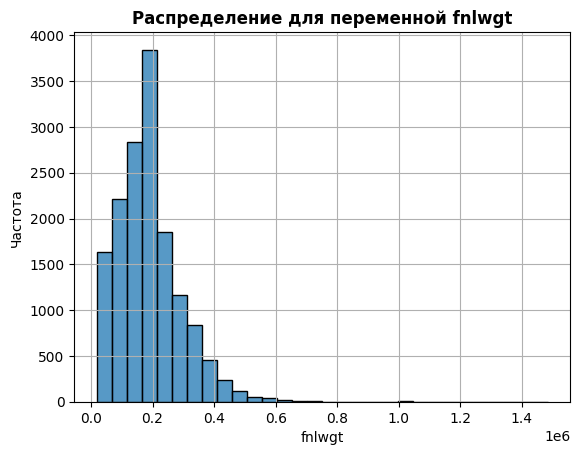

In [25]:
my_histplot(X_num, 'fnlwgt')

**Мой комментарий:** распределение имеет достаточно тяжелый хвост, скошено вправо

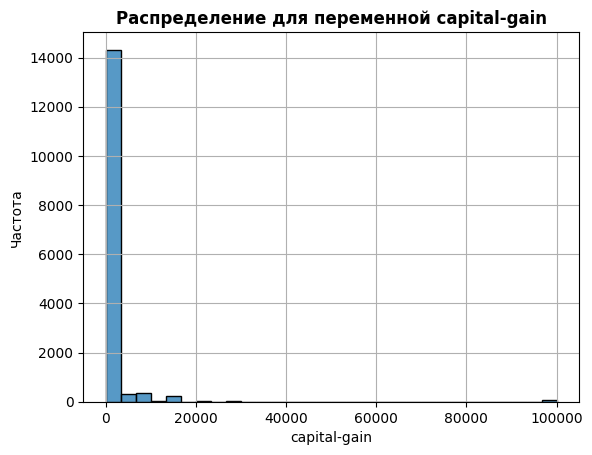

In [26]:
my_histplot(X_num, 'capital-gain')

**Мой комментарий:** распределение имеет невероятно тяжелый хвост, скошено вправо. Очень большие положительные выбросы.

**Вывод:**
- Масштабирование критично для линейной модели, поэтому в случае использования линейной модели, обязательно нужно масштабировать признаки 
- Масштабирование некритично для дерева, случайного леса, бустинга

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).

**Задание 6 (2 балла)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

In [27]:
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

Дерево (масштабир.). Лучший ROC-AUC на CV получается при max_depth = 7


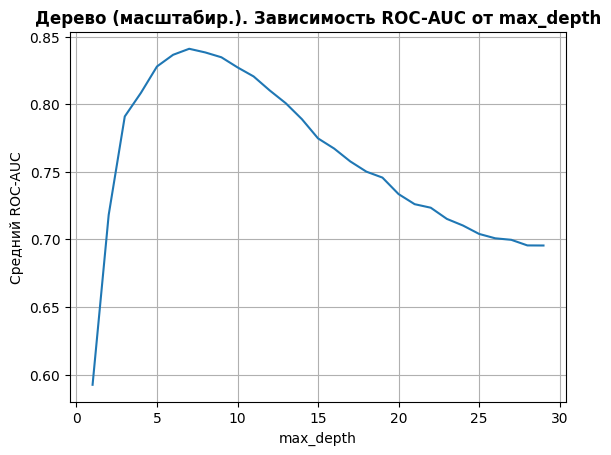

In [29]:
param_grid = {'max_depth': np.arange(1, 30)}

tree = DecisionTreeClassifier()
grid_tree_scaled = GridSearchCV(tree, param_grid, cv=cv, scoring='roc_auc')

grid_tree_scaled.fit(X_num_scaled, y)

best_tree_scaled = grid_tree_scaled.best_estimator_
best_tree_depth_scaled = grid_tree_scaled.best_params_['max_depth']
best_tree_auc_scaled = grid_tree_scaled.best_score_

depths_tree_scaled = grid_tree_scaled.cv_results_['param_max_depth'].data.astype(int)
scores_tree_scaled = grid_tree_scaled.cv_results_['mean_test_score']

print('Дерево (масштабир.). Лучший ROC-AUC на CV получается при max_depth =', depths_tree_scaled[scores_tree_scaled.argmax()])

plt.plot(depths_tree_scaled, scores_tree_scaled)
plt.xlabel('max_depth')
plt.ylabel('Средний ROC-AUC')
plt.title('Дерево (масштабир.). Зависимость ROC-AUC от max_depth', fontweight='bold')
plt.grid(True)
plt.show()

Случайный лес (масштабир.). Лучший ROC-AUC на CV получается при max_depth = 11


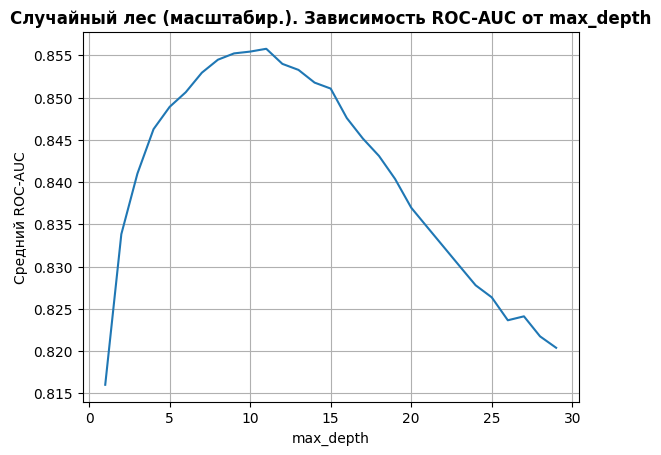

In [30]:
random_forest = RandomForestClassifier()
grid_random_forest_scaled = GridSearchCV(random_forest, param_grid, cv=cv, scoring='roc_auc')

grid_random_forest_scaled.fit(X_num_scaled, y)

best_random_forest_scaled = grid_random_forest_scaled.best_estimator_
best_random_forest_depth_scaled = grid_random_forest_scaled.best_params_['max_depth']
best_random_forest_auc_scaled = grid_random_forest_scaled.best_score_

depths_random_forest_scaled = grid_random_forest_scaled.cv_results_['param_max_depth'].data.astype(int)
scores_random_forest_scaled = grid_random_forest_scaled.cv_results_['mean_test_score']

print('Случайный лес (масштабир.). Лучший ROC-AUC на CV получается при max_depth =', depths_random_forest_scaled[scores_random_forest_scaled.argmax()])

plt.plot(depths_random_forest_scaled, scores_random_forest_scaled)
plt.xlabel('max_depth')
plt.ylabel('Средний ROC-AUC')
plt.title('Случайный лес (масштабир.). Зависимость ROC-AUC от max_depth', fontweight='bold')
plt.grid(True)
plt.show()


Бустинг (масштабир.). Лучший ROC-AUC на CV получается при max_depth = 4


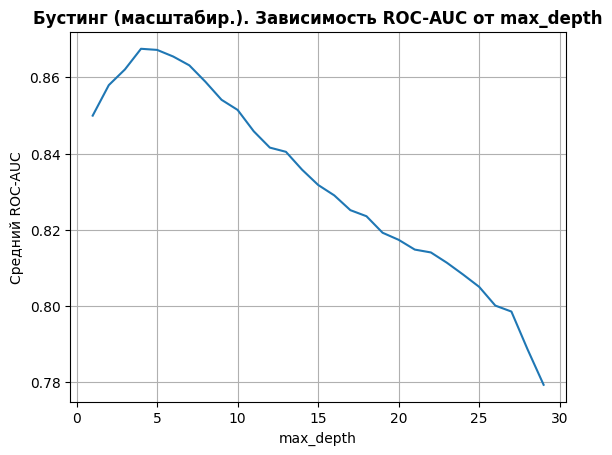

In [ ]:
boosting = GradientBoostingClassifier()
grid_boosting_scaled = GridSearchCV(boosting, param_grid, cv=cv, scoring='roc_auc')

grid_boosting_scaled.fit(X_num_scaled, y)

best_boosting_scaled = grid_boosting_scaled.best_estimator_
best_boosting_depth_scaled = grid_boosting_scaled.best_params_['max_depth']
best_boosting_auc_scaled = grid_boosting_scaled.best_score_

depths_boosting_scaled = grid_boosting_scaled.cv_results_['param_max_depth'].data.astype(int)
scores_boosting_scaled = grid_boosting_scaled.cv_results_['mean_test_score']

print('Бустинг (масштабир.). Лучший ROC-AUC на CV получается при max_depth =', depths_boosting_scaled[scores_boosting_scaled.argmax()])

plt.plot(depths_boosting_scaled, scores_boosting_scaled)
plt.xlabel('max_depth')
plt.ylabel('Средний ROC-AUC')
plt.title('Бустинг (масштабир.). Зависимость ROC-AUC от max_depth', fontweight='bold')
plt.grid(True)
plt.show()

Изменилось ли качество у некоторых алгоритмов?

In [ ]:
print(f'Дерево: max_depth: {best_tree_depth_scaled}, ROC-AUC: {best_tree_auc_scaled:.2f}')
print(f'Лес: max_depth: {best_random_forest_depth_scaled}, ROC-AUC: {best_random_forest_auc_scaled:.2f}')
print(f'Бустинг: max_depth {best_boosting_depth_scaled}, ROC-AUC: {best_boosting_auc_scaled:.2f}')

Дерево: max_depth: 7, ROC-AUC: 0.84
Лес: max_depth: 11, ROC-AUC: 0.86
Бустинг: max_depth 4, ROC-AUC: 0.87


**Мой комментарий:** я использовал `StandardScaler` для масштабирования и получил соответсвующие значения оптимальных гиперпараметров с точки зрения ROC-AUC:
- Дерево: max_depth: 7, ROC-AUC: 0.84
- Лес: max_depth: 11, ROC-AUC: 0.86
- Бустинг: max_depth 4, ROC-AUC: 0.87

**Задание 7 (3 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае:
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - GradientBoosting — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)

Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

### Дерево

In [ ]:
param_grid = {
    'max_depth': np.arange(1, 30),
    'criterion': ['gini', 'entropy']
}

tree = DecisionTreeClassifier()
grid_tree_multi = GridSearchCV(tree, param_grid, cv=cv, scoring='roc_auc')

grid_tree_multi.fit(X_num, y)

best_tree_multi = grid_tree_multi.best_estimator_
best_tree_params = grid_tree_multi.best_params_
best_tree_auc = grid_tree_multi.best_score_

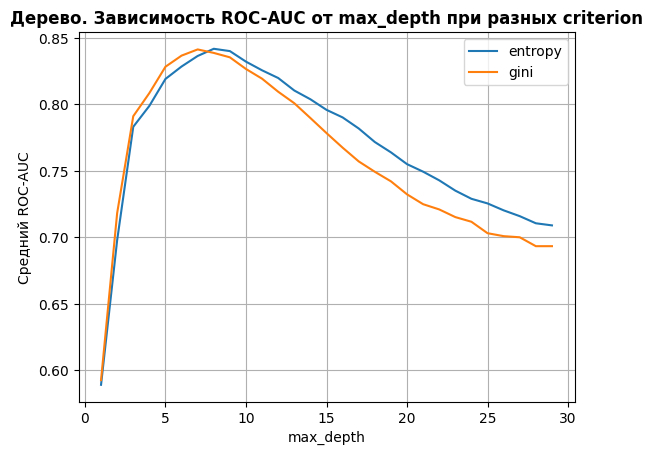

In [ ]:
depths = grid_tree_multi.cv_results_['param_max_depth'].data.astype(int)
criteria = grid_tree_multi.cv_results_['param_criterion'].data
scores = grid_tree_multi.cv_results_['mean_test_score']

for crit in np.unique(criteria):
    mask = criteria == crit
    plt.plot(depths[mask], scores[mask], label=f'{crit}')

plt.xlabel('max_depth')
plt.ylabel('Средний ROC-AUC')
plt.title('Дерево. Зависимость ROC-AUC от max_depth при разных criterion', fontweight='bold')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
best_tree_params

{'criterion': 'entropy', 'max_depth': np.int64(8)}

**Мой комментарий:** для дерева, как видно по графику, лучшее качество достигается, когда мы считаем энтропию и параметр `max_depth` = 8

### Случайный лес

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

random_forest = RandomForestClassifier(n_estimators=300)
grid_random_forest = GridSearchCV(random_forest, param_grid, cv=cv, scoring='roc_auc')

grid_random_forest.fit(X_num, y)
best_random_forest = grid_random_forest.best_estimator_
best_random_forest_params = grid_random_forest.best_params_
best_random_forest_auc = grid_random_forest.best_score_

In [ ]:
best_random_forest_params

{'criterion': 'entropy', 'max_features': None}

In [ ]:
criteria = grid_random_forest.cv_results_['param_criterion'].data
max_features = grid_random_forest.cv_results_['param_max_features'].data.astype(str)
scores = grid_random_forest.cv_results_['mean_test_score']

for a, b, c in zip(criteria, max_features, scores):
    print(f"criterion = {a}, max_features = {b}, ROC-AUC = {c:.6f}")

criterion = gini, max_features = sqrt, ROC-AUC = 0.819267
criterion = gini, max_features = log2, ROC-AUC = 0.818432
criterion = gini, max_features = None, ROC-AUC = 0.817744
criterion = entropy, max_features = sqrt, ROC-AUC = 0.819665
criterion = entropy, max_features = log2, ROC-AUC = 0.820487
criterion = entropy, max_features = None, ROC-AUC = 0.821135


**Мой комментарий:** возьмём лучший результат, который достигается при гиперпараметрах: `criterion` = entropy, `max_features` = None

### Бустинг

In [ ]:
param_grid = {
    'criterion': ['friedman_mse', 'squared_error'],
    'max_features': ['sqrt', 'log2', None]
}

boosting = GradientBoostingClassifier(n_estimators=300)
grid_boosting = GridSearchCV(boosting, param_grid, cv=cv, scoring='roc_auc')

grid_boosting.fit(X_num, y)
best_boosting = grid_boosting.best_estimator_
best_boosting_params = grid_boosting.best_params_
best_boosting_auc = grid_boosting.best_score_

In [ ]:
best_boosting_params

{'criterion': 'squared_error', 'max_features': 'log2'}

In [ ]:
criteria = grid_boosting.cv_results_['param_criterion'].data
max_features = grid_boosting.cv_results_['param_max_features'].data.astype(str)
scores = grid_boosting.cv_results_['mean_test_score']

for a, b, c in zip(criteria, max_features, scores):
    print(f"criterion = {a}, max_features = {b}, ROC-AUC = {c:.6f}")

criterion = friedman_mse, max_features = sqrt, ROC-AUC = 0.865100
criterion = friedman_mse, max_features = log2, ROC-AUC = 0.865748
criterion = friedman_mse, max_features = None, ROC-AUC = 0.865500
criterion = squared_error, max_features = sqrt, ROC-AUC = 0.866027
criterion = squared_error, max_features = log2, ROC-AUC = 0.866065
criterion = squared_error, max_features = None, ROC-AUC = 0.865558


**Мой комментарий:** по сути разницы нет, но, тем не менее, возьмём лучший результат достигается при гиперпараметрах: `criterion` = squared_error, `max_features` = log2

Какой из алгоритмов имеет наилучшее качество?

**Мой ответ:** лучшее качество имеет бустинг: ROC-AUC = 0.866

**Задание 8 (1 балла)** Сравните алгоритмы с точки зрения времени обучения с помощью библиотеки [time](https://www.geeksforgeeks.org/python-time-module/) или [tqdm](https://pypi.org/project/tqdm/). Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

In [ ]:
models = {
    'Дерево': DecisionTreeClassifier(criterion='entropy', max_depth=8),
    'Случайный лес': RandomForestClassifier(n_estimators=300, criterion='entropy', max_features=None),
    'Бустинг': GradientBoostingClassifier(n_estimators=300, criterion='squared_error', max_features='log2')
}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_num, y)
    print(f'Модель: {name}, Время обучения (сек): {(time.time() - start_time):.2f}')

Модель: Дерево, Время обучения (сек): 0.03
Модель: Случайный лес, Время обучения (сек): 8.42
Модель: Бустинг, Время обучения (сек): 1.19


**Мой ответ:** случайный лес обучался дольше всего, потому что ему пришлось построить много деревьев. Я сравниваю именно обучение моделей с уже подобранными оптимальными гиперпараметрами, чтобы не тратить время перебор сетки.

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков.

**Задание 9 (1 балл)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [31]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

ohe = OneHotEncoder(drop='first')
X_cat_ohe = ohe.fit_transform(X[cat_cols])

**Задание 10 (1 балл)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта (когда мы перебирали по 2 гипперпараметра). Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV.

In [ ]:
X_full = np.hstack([X_num_scaled, X_cat_ohe.toarray()])

In [ ]:
models = {
    'Дерево': DecisionTreeClassifier(criterion='entropy', max_depth=8),
    'Случайный лес': RandomForestClassifier(n_estimators=300, criterion='entropy', max_features=None),
    'Бустинг': GradientBoostingClassifier(n_estimators=300, criterion='squared_error', max_features='log2')
}

for name, model in models.items():
    scores = cross_val_score(model, X_full, y, cv=cv, scoring='roc_auc')
    print(f"{name}: ROC-AUC = {scores.mean():.6f}")

Дерево: ROC-AUC = 0.8895
Случайный лес: ROC-AUC = 0.9029
Бустинг: ROC-AUC = 0.9183


Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

**Мой ответ:** лучшим классификатором по прежнему является бустинг с ROC-AUC = 0.918, а в прошлый раз он показал качество ROC-AUC = 0.866


**Задание 11 (2 балла)**

Раз уж тут новогоднее настроение должно быть, то напишите пиьмо Деду Морозу со своими пожеланиями на грядущий год, упакуйте в красивый конверт, и сделайте крутую фотку этого письма под новогодней наряженной елкой 🌠
Показывать что вы написали ни в коем случае не надо)

<img src="assets/tree.jpg" width="400">

## Задание 12 (4 балла)

В качестве задания предлагаю вам развернуть свое собственное приложение в *Streamlit*.
DataScience - это огромная сфера, в которой уживаются множество разнообразных специальностей. Дата аналитики, дата ~~сатанисты~~ саентисты, мл инженеры и многие другие. Так как рынок очень быстро растет, то потребность постоянно обновлять знания повышается также как и требования от специалистов. На данный момент очень ценятся навыки работы в смежных областях науки о данных. Написание своего приложения - это небольшая попытка соединить бэкненд и дата саенс.

**Что нужно сделать?**

Чтобы успешно развернуть свое приложения на Streamlit нужно сделать несколько простых действий:

1) Создать новый публичный репрезиторий на Гитхаб
2) Клонировать этот репрезиторий на компьютер
3) В папке с репрезиторием создать виртуальное окружение (не забудьте добавить его в .gitignore)
4) Создать приложение Streamlit, которое будет работать на основе вашей лучшей модели из этого домашнего задания
5) Запушить приложение на Гитхаб, не забыв создать файл requirements.txt
6) Развернуть (задеплоить) приложение на [Streamlit Cloud](https://streamlit.io/cloud)

**Требования к приложению**

Приложение должно быть аккуратно оформлено, так, чтобы не стыдно было показать маме. Пользователь, который будет взаимодействовать с приложением, будет сам вбивать данные как в примере [тут](https://rateyourandom_forestlight.streamlit.app/). Модель должна предсказывать человеку превысит ли его средний заработок порог $50k. Не стесняйтесь проявлять креативность, делайте так, чтобы с приложением было бы удобно взаимодействовать.

**В качестве ответа на это задание вставьте ссылку на репрезиторий Гитхаб и ссылку на приложение в интернете.**



**Ответ на задание**
- Мне стало интересно и я отделил от UI на Streamlit предсказание модели, создав API 
- Кроме того задеплоил и API, и приложение на Streamlit на свой сервер
    - UI: https://app.artkmlv.ru
    - API: https://api.artkmlv.ru/docs
- Тем не менее, выполнил и требование задания, задеплоив на Streamlit Cloud: https://ml-income-predictor-app.streamlit.app/
- Репозиторий на Github: https://github.com/kamalov-artur/ml-income-predictor-app